In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Xs = np.load('../DNN/DNN_sample/SPANet_embedding/DNN_signal_mixing_train_v0-embedding.npy')
Xb = np.load('../DNN/DNN_sample/SPANet_embedding/DNN_pp4b_mixing_train_v0-embedding.npy')
X = np.vstack([Xs,Xb])

In [3]:
Ys = np.load('../DNN/DNN_sample/DNN_signal_mixing_train_mix-class-SPANET2.npy')
Yb = np.load('../DNN/DNN_sample/DNN_pp4b_mixing_train_mix-class-SPANET2.npy')
Y = np.vstack([Ys,Yb])

In [25]:
n_pca = 10
pca = PCA(n_components=n_pca)

newX = pca.fit_transform(X)

newXs = pca.transform(Xs)
newXb = pca.transform(Xb)

exp_var_pca = pca.explained_variance_ratio_

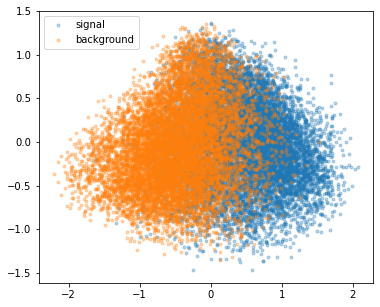

In [26]:
fig, ax = plt.subplots(1, 1, figsize =(6, 5))
n_event = 10000
ax.scatter(newXs[:,0][:n_event],newXs[:,1][:n_event], label='signal', marker='.', alpha=0.3)
ax.scatter(newXb[:,0][:n_event],newXb[:,1][:n_event], label='background', marker='.', alpha=0.3)

ax.legend()
plt.show()

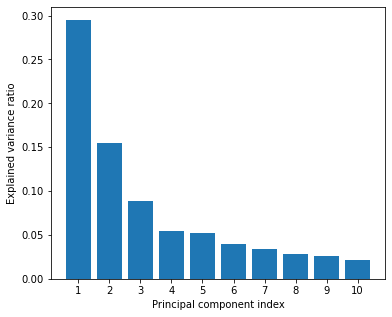

In [27]:
fig, ax = plt.subplots(1, 1, figsize =(6, 5))
ax.bar(np.arange(0,n_pca)+1,pca.explained_variance_ratio_)
# ax.plot(pca.explained_variance_ratio_, color='k', marker='.')

ax.set_xlabel('Principal component index')
ax.set_ylabel('Explained variance ratio')

ax.xaxis.set_ticks(np.arange(0,n_pca)+1)
plt.savefig('figures/PCA_variance_ratio.png', 
            facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

# Correlation coefficients of Principal components and High level observables

In [28]:
n_pca = 3
pca_labels = [f'PC {x}' for x in range(1,1+n_pca)]

y_selection = [0,1,2,3,
               4,5,6,7,
               8,9,
               10,11,
#                12,13,
#                14,15,16,17,
               18,19,
               20]

y_labels = np.array(['Pt1', 'Eta1', 'Phi1', 'Mass1', 
            'Pt2', 'Eta2', 'Phi2', 'Mass2',
            'dR1', 'dR2',
            'Et_miss', 'Phi_miss',
            'N_e', 'N_mu',
            'BTag1', 'BTag2', 'BTag3', 'BTag4', 
            'Pthh', 'mhh',
            'kappa',
           ])[y_selection]
labels = []
labels.extend(pca_labels)
labels.extend(y_labels)

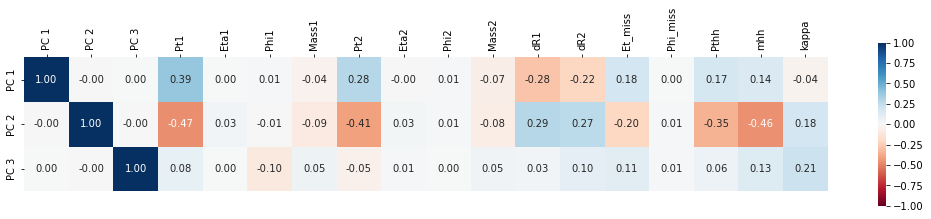

In [29]:
fig, ax = plt.subplots(figsize=(18, 3))
corr = np.corrcoef(newX.transpose()[:n_pca], Y.transpose()[y_selection])
sns.heatmap(corr[:n_pca,:], annot=True, 
            xticklabels=labels, 
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.savefig('figures/correlation_coefficients_pca.png',
            facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

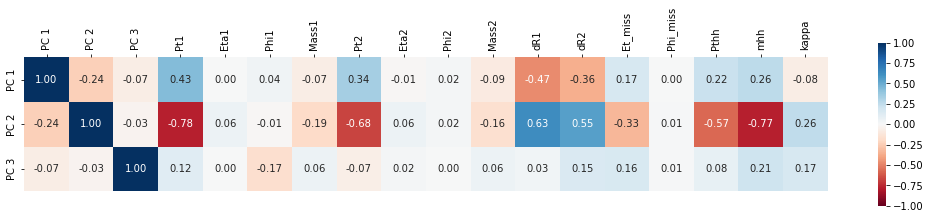

In [31]:
fig, ax = plt.subplots(figsize=(18, 3))
corr = np.corrcoef(newXs.transpose()[:n_pca], Ys.transpose()[y_selection])
sns.heatmap(corr[:n_pca,:], annot=True, 
            xticklabels=labels,
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.savefig('figures/correlation_coefficients_pca-signal.png',
            facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

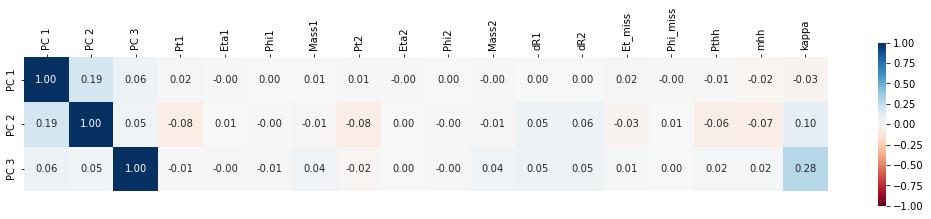

In [30]:
fig, ax = plt.subplots(figsize=(18, 3))
corr = np.corrcoef(newXb.transpose()[:n_pca], Yb.transpose()[y_selection])
sns.heatmap(corr[:n_pca,:], annot=True, 
            xticklabels=labels, 
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.savefig('figures/correlation_coefficients_pca-background.png',
            facecolor='White', dpi=300, bbox_inches='tight')
plt.show()